<a href="https://colab.research.google.com/github/MuhammadUsaid/QuantumCircuitForEntanglementPurification/blob/master/EntanglementPurification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

In [ ]:
# these three import lines are essential for running a quantum circuit 
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator
# also import a visualization tool from qiskit
from qiskit.tools.visualization import plot_histogram
# import numpy incase we need it
import numpy as np
import random

In [ ]:
def measurementX(circ, qbit, cbit):
  '''It will measure in X Basis'''
  circ.h(qbit)
  circ.measure(qbit, cbit)
  circ.h(qbit)
def measurementZ(circ, qbit, cbit):
  '''Measurement in usual z basis which is default'''
  circ.measure(qbit, cbit)
def bellStates(circ, qbit1, qbit2):
  '''Will take circuit and qubits to prepare Bell States'''
  circ.h(qbit1)
  circ.cx(qbit1,qbit2)

In [ ]:
def initializeCircuit(n):
  qreg = QuantumRegister(n,'q')
  creg = ClassicalRegister(n,'c')
  circ = QuantumCircuit(qreg, creg)
  return circ,qreg,creg
def fixedPurificationCircuit(circ, qreg, creg, inputs):
  ''' This Function makes a single selection Circuit for Entanglement Purification '''
  # To put x gates according to the input
  for i in range(len(inputs)):
    if inputs[i] == 1:
      circ.x(qreg[i])
  n = len(inputs)
  for i in range(0,n//2):
    bellStates(circ, qreg[i], qreg[i+n//2])
  #The following circuit is for Alice
  circ.cx(qreg[0], qreg[1])
  circ.cx(qreg[2], qreg[1])
  measurementZ(circ,qreg[1], creg[1])
  measurementX(circ,qreg[2], creg[2])
  #The following circuit is for Bob
  circ.cx(qreg[3], qreg[4])
  circ.cx(qreg[5], qreg[4])
  measurementZ(circ,qreg[4], creg[4])
  measurementX(circ,qreg[5], creg[5])
  #print(qiskit.circuit.Measure.c_if(,1))
  return circ
def checkCoincidence(counts):
  '''This Function checks if measurements on respective sacrificial pairs are coincidence or not'''
  for i in counts:
    if not (i[0] == i[3] and i[1] == i[4]):
      return False
  return True
def showResults(circ):
  simulator = Aer.get_backend('qasm_simulator')
  job = execute(circ,simulator,shots=1000)
  result = job.result()
  counts = result.get_counts()
  return counts

In [ ]:
circ,qreg,creg = initializeCircuit(6)
print(fixedPurificationCircuit(circ,qreg,creg,[0,0,0,0,0,0,]))

     ┌───┐                                                 
q_0: ┤ H ├──■─────────■────────────────────────────────────
     ├───┤  │       ┌─┴─┐┌───┐     ┌─┐                     
q_1: ┤ H ├──┼────■──┤ X ├┤ X ├─────┤M├─────────────────────
     ├───┤  │    │  └───┘└─┬─┘┌───┐└╥┘        ┌─┐┌───┐     
q_2: ┤ H ├──┼────┼────■────■──┤ H ├─╫─────────┤M├┤ H ├─────
     └───┘┌─┴─┐  │    │       └───┘ ║         └╥┘└───┘     
q_3: ─────┤ X ├──┼────┼────■────────╫──────────╫───────────
          └───┘┌─┴─┐  │  ┌─┴─┐┌───┐ ║ ┌─┐      ║           
q_4: ──────────┤ X ├──┼──┤ X ├┤ X ├─╫─┤M├──────╫───────────
               └───┘┌─┴─┐└───┘└─┬─┘ ║ └╥┘┌───┐ ║  ┌─┐ ┌───┐
q_5: ───────────────┤ X ├───────■───╫──╫─┤ H ├─╫──┤M├─┤ H ├
                    └───┘           ║  ║ └───┘ ║  └╥┘ └───┘
c_0: ═══════════════════════════════╬══╬═══════╬═══╬═══════
                                    ║  ║       ║   ║       
c_1: ═══════════════════════════════╩══╬═══════╬═══╬═══════
                                       ║

In [ ]:
def prob(F,q):
  '''This is the function to calculate the theoretical probability depending on F'''
  return ((F)**3 + 3 * (F)**2 * (q) + 7 * (F) * (q)**2 + 5 * (q)**3)

In [ ]:
n = 6
dic = {'A': (0,0), 'B': (1,1), 'C': (0,1), 'D': (1,0)}
inputs = [0,0,0,0,0,0]
F = 90 #The value of F is multiplied by 100 to use in choices method properly
q = (100-F)/3
weights = [F, q, q, q]
countA = 0
for _ in range(1000):
  for i in range(n//2):
    arg = random.choices(["A", "B", "C", "D"], weights = weights, k = 1)
    inputs[i],inputs[i+3] = dic[arg[0]]
  circ, qreg, creg = initializeCircuit(n)
  fixedPurificationCircuit(circ, qreg, creg, inputs)
  counts = showResults(circ)
  if checkCoincidence(counts):
    countA += 1

759

In [ ]:
n = 6
dic = {'A': (0,0), 'B': (1,1), 'C': (0,1), 'D': (1,0)}
inputs = [0,0,0,0,0,0]
expectedProbabilites = []
calculatedProbabilities = []
for F in range(5,100,5): #The loop to iterate over different probabities of A i.e F
  q = (100-F)/3
  weights = [F, q, q, q]
  coincidenceCount = 0 #This will count the coincidence measurements
  for _ in range(1000): #This loop will run circuit 1000 times
    for i in range(n//2):
      arg = random.choices(["A", "B", "C", "D"], weights = weights, k = 1)
      inputs[i],inputs[i+3] = dic[arg[0]]
    circ, qreg, creg = initializeCircuit(n)
    fixedPurificationCircuit(circ, qreg, creg, inputs)
    counts = showResults(circ)
    if checkCoincidence(counts):
      coincidenceCount += 1
  expectedProbabilites.append(prob(F/100,q/100))
  calculatedProbabilities.append(coincidenceCount/1000)

In [ ]:
listOfF = [ prob((i/100),(1-(i/100))/3)  for i in range(5,100,5)]
F = list(range(5,100,5))
[i/100for i in F]

[0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [ ]:
lst = [(0.19637037037037036, 0.253),
(0.208, 0.261),
(0.22051851851851847, 0.237),
(0.2343703703703704, 0.27),
(0.25, 0.245),
(0.2678518518518518, 0.254),
(0.28837037037037033, 0.253),
(0.312, 0.28),
(0.33918518518518526, 0.265),
(0.37037037037037035, 0.332),
(0.4060000000000001, 0.335),
(0.4465185185185185, 0.37),
(0.49237037037037035, 0.39),
(0.5439999999999999, 0.45),
(0.6018518518518519, 0.51),
(0.6663703703703705, 0.572),
(0.7379999999999999, 0.647),
(0.8171851851851852, 0.768),
(0.9043703703703704, 0.863)]

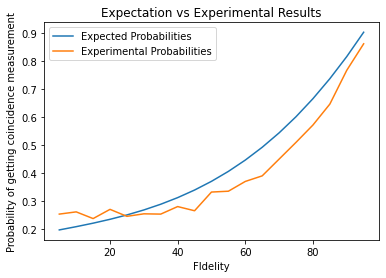

In [ ]:
x = F
y1 = [i[0] for i in lst]
y2 = [i[1] for i in lst]
plt.plot(x,y1, label="Expected Probabilities")
plt.title("Expectation vs Experimental Results")
plt.plot(x,y2, label="Experimental Probabilities")
plt.legend()
plt.xlabel("FIdelity")
plt.ylabel("Probability of getting coincidence measurement")
plt.show()

In [ ]:
for i in range(len(listOfF)):
  print(listOfF[i], calculatedProbabilities[i])

0.19637037037037036 0.253
0.208 0.261
0.22051851851851847 0.237
0.2343703703703704 0.27
0.25 0.245
0.2678518518518518 0.254
0.28837037037037033 0.253
0.312 0.28
0.33918518518518526 0.265
0.37037037037037035 0.332
0.4060000000000001 0.335
0.4465185185185185 0.37
0.49237037037037035 0.39
0.5439999999999999 0.45
0.6018518518518519 0.51
0.6663703703703705 0.572
0.7379999999999999 0.647
0.8171851851851852 0.768
0.9043703703703704 0.863


In [ ]:
class Individual:
  def __init__(self, n):
    self.qreg = QuantumRegister(n * 2, 'q')
    self.creg = ClassicalRegister(n * 2, 'c')
    self.circ =  QuantumCircuit(self.qreg, self.creg)
    self.n = n
    self.gates = []
    self.operations = 0
    self.steps = 0
  def generateRandomCircuit(self):
    n = self.n
    gates = random.choices(['cx','cz','x','h'], k = random.randint(2,8))
    gates += random.choices(['X','Z'], k = 2)
    j = n-1
    for i in gates:
      if i == 'cx' or i == 'cz':
        a,b = random.sample(set(range(1,n)),2)
        self.gates.append((i, (a,b)))
      elif i == 'h' or i == 'x':
        self.gates.append((i,random.randint(0,n-1)))
      elif i == 'X' or i == 'Z':
        self.gates.append((i, j))
        j -= 1
  def updateParameters(self):
    self.steps = self.circ.width()
    self.operations = len(self.circ)
  def measurementX(self, qbit, cbit):
    '''It will measure in X Basis'''
    self.circ.h(qbit)
    self.circ.measure(qbit, cbit)
    self.circ.h(qbit)
  def measurementZ(self, qbit, cbit):
    '''Measurement in usual z basis which is default'''
    self.circ.measure(qbit, cbit)
  def bellStates(self, qbit1, qbit2):
    '''Will take circuit and qubits to prepare Bell States'''
    self.circ.h(qbit1)
    self.circ.cx(qbit1,qbit2)
  def initializeCircuit(self):
    n = self.n
    self.qreg = QuantumRegister(n * 2, 'q')
    self.creg = ClassicalRegister(n * 2, 'c')
    self.circ =  QuantumCircuit(self.qreg, self.creg)
  def initializeInput(self, inputs):
    # To put x gates according to the input
    for i in range(len(inputs)):
      if inputs[i] == 1:
        self.circ.x(self.qreg[i])
    n = len(inputs)
    for i in range(0,n//2):
      self.bellStates((self.qreg)[i], (self.qreg)[i+n//2])
  def addGates(self):
    j = 0
    while j < self.n+1:
      for i in self.gates:
        key = i[0]
        val = i[1]
        if type(val) == type(1):
          val += j
          if key == 'x':
            self.circ.x(val)
          elif key == 'h':
            self.circ.h(val)
          elif key == 'X':
            self.measurementX(self.qreg[val], self.creg[val])
          elif key == 'Z':
            self.measurementZ(self.qreg[val], self.creg[val])
        elif len(val) == 2:
          a,b = val
          a += j
          b += j
          if key == "cx":
            self.circ.cx(a,b)
          elif key == "cz":
            self.circ.cz(a,b)
      j += self.n
        #print(self.circ)
    self.updateParameters()
  def showResults(self):
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(self.circ,simulator,shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts
  def checkCoincidence(self,counts):
    '''This Function checks if measurements on respective sacrificial pairs are coincidence or not'''
    for i in counts:
      if not (i[0] == i[3] and i[1] == i[4]):
        return False
    return True
  def coincidenceProbability(self):
    dic = {'A': (0,0), 'B': (1,1), 'C': (0,1), 'D': (1,0)}
    n = self.n
    inputs = [0] * (n * 2)
    F = 25 #The value of F is multiplied by 100 to use in choices method properly
    q = (100-F)/3
    weights = [F, q, q, q]
    countCoincidence = 0
    for _ in range(100):
      for i in range(n):
        arg = random.choices(["A", "B", "C", "D"], weights = weights, k = 1)
        inputs[i],inputs[i+n] = dic[arg[0]]
      self.initializeCircuit()
      self.initializeInput(inputs)
      self.addGates()
      counts = self.showResults()
      if self.checkCoincidence(counts):
        countCoincidence += 1
    return countCoincidence/100
  def fitness(self):
    prob = self.coincidenceProbability()
    return 0.2 * (1/self.steps) + 0.2 * (1/self.operations) + 0.6 * (prob)

In [ ]:
a = Individual(3)
a.generateRandomCircuit()
print(a.fitness())
print(a.circ)

0.1738095238095238
     ┌───┐                                                                
q_0: ┤ H ├──■─────────────────────────────────────────────────────────────
     ├───┤  │            ┌───┐┌───┐               ┌───┐   ┌─┐┌───┐        
q_1: ┤ H ├──┼────■───────┤ X ├┤ X ├──■─────────■──┤ H ├───┤M├┤ H ├────────
     ├───┤  │    │       └─┬─┘└───┘┌─┴─┐┌───┐┌─┴─┐├───┤┌─┐└╥┘└───┘        
q_2: ┤ H ├──┼────┼────■────■───────┤ X ├┤ X ├┤ X ├┤ X ├┤M├─╫──────────────
     ├───┤┌─┴─┐  │    │            └───┘└───┘└───┘└───┘└╥┘ ║              
q_3: ┤ X ├┤ X ├──┼────┼─────────────────────────────────╫──╫──────────────
     └───┘└───┘┌─┴─┐  │  ┌───┐┌───┐               ┌───┐ ║  ║      ┌─┐┌───┐
q_4: ──────────┤ X ├──┼──┤ X ├┤ X ├──■─────────■──┤ H ├─╫──╫──────┤M├┤ H ├
     ┌───┐     └───┘┌─┴─┐└─┬─┘└───┘┌─┴─┐┌───┐┌─┴─┐├───┤ ║  ║  ┌─┐ └╥┘└───┘
q_5: ┤ X ├──────────┤ X ├──■───────┤ X ├┤ X ├┤ X ├┤ X ├─╫──╫──┤M├──╫──────
     └───┘          └───┘          └───┘└───┘└───┘└───┘ ║  ║  └╥┘  ║      
c_0: ═

In [ ]:
class geneticAlgorithm:
  def generateRandomPopulation(self, size, numberOfQubits):
    population = []
    for i in range(size):
      pop = Individual(numberOfQubits)
      pop.generateRandomCircuit()
      population.append(pop)
    return population
  def calculateFitnesses(self, population):
    fitnesses = []
    for i in population:
      fitnesses.append(i.fitness())
    return fitnesses
  def crossover(self, sol1, sol2):
    n1 = (len(sol1) - 2) // 2
    n2 = (len(sol2) - 2) // 2
    n = n1 + n2
    sol = sol1[:len(sol1)-2] + sol2[:len(sol2)-2]
    kid1 = sol1[:n1] + sol2[n2:1+(2*n2)] + [sol1[-1]] + [sol2[-2]]
    kid2 = sol2[:n2] + sol1[n1:1+(2*n1)] + [sol1[-2]] + [sol2[-1]]
    kid3 = random.choices(sol, k = random.randint(2,(2*n)-1))
    kid4 = random.choices(sol, k = random.randint(2,(2*n)-1))
    kid3 += [sol1[-1]] + [sol2[-2]]
    kid4 += [sol1[-2]] + [sol2[-1]]
    return [kid1, kid2, kid3, kid4]
  def mutation(self, sol, rate):
    if random.randint(0,100) < rate:
      a, b = random.randint(0,len(sol) - 2), random.randint(0,len(sol) - 2)
      sol[a],sol[b] = sol[b], sol[a]
    return sol
  def fitnessProportional(self, fitnesses, numberSelected):
    '''Takes a List of fitness Values of Solutions and returns a list of the numberSelected indexes of selected solutions''' 
    F = sum(fitnesses)
    newFit = list(map(lambda x: x/F,fitnesses))
    for i in range(1,len(fitnesses)):
      newFit[i] = newFit[i] + newFit[i-1]
    result = []
    for k in range(numberSelected):
      r = random.random()
      for i in range(len(fitnesses)):
        if r < newFit[i]:
          result.append(i)
          break
    return result
  def rankBased(self, fitnesses, numberSelected):
    '''Takes a List of fitness Values of Solutions and returns a list of the numberSelected indexes of selected solutions''' 
    rank = [(fitnesses[i],i) for i in range(len(fitnesses))]
    rank.sort()
    newFit = fitnesses.copy()
    for i in range(len(rank)):
      newFit[rank[i][1]] = i+1
    return self.fitnessProportional(fitnesses, numberSelected)
  def binaryTournament(self, fitnesses, numberSelected):
    '''Takes a List of fitness Values of Solutions and returns a list of the numberSelected indexes of selected solutions''' 
    result = []
    for i in range(numberSelected):
      r1 = random.randint(0,len(fitnesses)-1)
      r2 = random.randint(0,len(fitnesses)-1)
      result.append(max(r1,r2))
    return result
  def randomSelection(self, fitnesses, numberSelected):
    '''Takes a List of fitness Values of Solutions and returns a list of the numberSelected indexes of selected solutions''' 
    result = []
    for i in range(numberSelected):
      result.append(random.randint(0,len(fitnesses)-1))
    return result
  def truncation(self, fitnesses, numberSelected):
    '''Takes a List of fitness Values of Solutions and returns a list of the numberSelected indexes of selected solutions''' 
    rank = [(fitnesses[i],i) for i in range(len(fitnesses))]
    rank.sort(reverse=True)
    return [rank[i][1] for i in range(len(rank))][:numberSelected]
  def select(self, solutions, fitnesses, number, scheme):
    '''Takes a list of solutions, fitnesses and returns the number selections according to the Scheme'''
    indexes = []
    if scheme == "fps":
      indexes = self.fitnessProportional(fitnesses, number)
    elif scheme == "rbs":
      indexes = self.rankBased(fitnesses, number)
    elif scheme == "bin":
      indexes = self.binaryTournament(fitnesses, number)
    elif scheme == "random":
      indexes = self.randomSelection(fitnesses, number)
    elif scheme == "trun":
      indexes = self.truncation(fitnesses, number)
    else:
      print("Error In Parent Selection: Scheme is wrong \n Enter fps, rbs, bin, random or trun")
      return
    result = []
    resultFitness = []
    for i in indexes:
      result.append(solutions[i])
      resultFitness.append(fitnesses[i])
    return result, resultFitness
  def evolve(self, populationSize, generations, numberOfQubits, parentScheme, survivorScheme):
    population = self.generateRandomPopulation(populationSize, numberOfQubits)
    mutationRate = 100
    for g in range(generations):
      print("Generation:",g)
      fitnesses = self.calculateFitnesses(population)
      print("Fitnesses:", fitnesses)
      parents = self.select(population, fitnesses, populationSize//2, parentScheme)[0]
      kids = []
      for i in range(0,len(parents),2):
        kids += self.crossover(parents[i].gates,parents[i+1].gates)
      newPop = []
      #print(kids)
      for i in kids:
        c = self.mutation(i,mutationRate)
        a = Individual(numberOfQubits)
        a.gates = c
        #print(i)
        newPop.append(a)
      kidFitnesses = self.calculateFitnesses(newPop)
      population += newPop
      fitnesses += kidFitnesses
      population = self.select(population, fitnesses, populationSize, survivorScheme)[0]
      mutationRate *= 0.98
    return population

In [ ]:
g = geneticAlgorithm()
circs = g.evolve(20, 50, 3, "rbs", "bin")

Generation: 0
Fitnesses: [0.1860740740740741, 0.16235897435897437, 0.1498095238095238, 0.2384313725490196, 0.187, 0.1813623188405797, 0.19466666666666668, 0.18066666666666667, 0.18511827956989246, 0.1858095238095238, 0.18035897435897436, 0.18775757575757576, 0.20177777777777778, 0.1855632183908046, 0.19691666666666666, 0.12533333333333335, 0.23222222222222222, 0.175, 0.1798095238095238, 0.13672727272727273]
Generation: 1
Fitnesses: [0.2083809523809524, 0.19266666666666668, 0.11254901960784314, 0.18666666666666668, 0.024666666666666667, 0.1678095238095238, 0.18635897435897436, 0.17333333333333334, 0.2053623188405797, 0.1753623188405797, 0.18666666666666668, 0.18066666666666667, 0.17238095238095238, 0.15580952380952381, 0.2220740740740741, 0.024074074074074074, 0.2098095238095238, 0.21491666666666667, 0.1798095238095238, 0.18635897435897436]
Generation: 2
Fitnesses: [0.31466666666666665, 0.331, 0.1435632183908046, 0.21533333333333335, 0.13807407407407407, 0.023809523809523808, 0.02254901

In [ ]:
fit = np.mean([0.6277777777777778, 0.6266666666666666, 0.6266666666666666, 0.6266666666666666, 0.63, 0.6277777777777778, 0.6277777777777778, 0.6271929824561403, 0.6261904761904762, 0.6271929824561403, 0.6277777777777778, 0.6291666666666667, 0.6271929824561403, 0.6277777777777778, 0.6266666666666666, 0.6291666666666667, 0.6277777777777778, 0.6261904761904762, 0.6266666666666666, 0.6284313725490196])
fit

0.6275362302815864

In [ ]:
fitnesses.append(fit)
fitnesses

[0.18263819826945363,
 0.29571043957887594,
 0.6277240712074303,
 0.6275507049709836,
 0.6279441987321245,
 0.6274204551038917,
 0.6276465796845054,
 0.6275207626910413,
 0.6277740920929776,
 0.6275362302815864,
 0.6275362302815864]

In [ ]:
for i in circs:
  print(i.circ)
  print(i.gates)

     ┌───┐┌───┐                              
q_0: ┤ X ├┤ H ├───────■──────────────────────
     ├───┤└───┘       │            ┌───┐     
q_1: ┤ H ├──■─────────┼────■────■──┤ X ├──■──
     ├───┤  │         │  ┌─┴─┐┌─┴─┐└───┘┌─┴─┐
q_2: ┤ H ├──┼────■────┼──┤ X ├┤ X ├─────┤ X ├
     └───┘  │    │  ┌─┴─┐└───┘└───┘     └───┘
q_3: ───────┼────┼──┤ X ├────────────────────
          ┌─┴─┐  │  └───┘     ┌───┐          
q_4: ─────┤ X ├──┼────■────■──┤ X ├──■───────
          └───┘┌─┴─┐┌─┴─┐┌─┴─┐└───┘┌─┴─┐     
q_5: ──────────┤ X ├┤ X ├┤ X ├─────┤ X ├─────
               └───┘└───┘└───┘     └───┘     
c_0: ════════════════════════════════════════
                                             
c_1: ════════════════════════════════════════
                                             
c_2: ════════════════════════════════════════
                                             
c_3: ════════════════════════════════════════
                                             
c_4: ═════════════════════════════

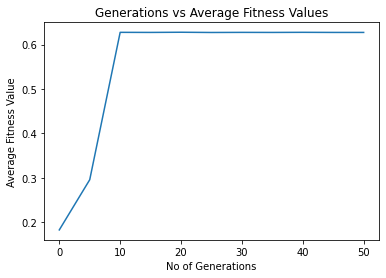

In [ ]:
plt.plot(generations,fitnesses, label="Average Fitnesses")
plt.title("Generations vs Average Fitness Values")
plt.xlabel("No of Generations")
plt.ylabel("Average Fitness Value")
plt.show()